In [5]:
x = [1,2,3]
y =[1,5,9]


ValueError: The number of derivatives at boundaries does not match: expected 1, got 0+0

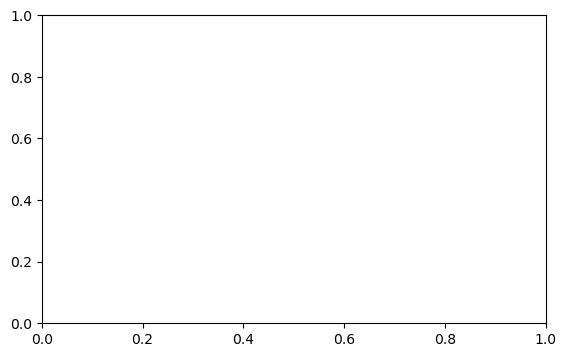

In [23]:
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6,7,8,9]
y =[9,5,9,6,7,3,4,8,6]
n = len(x)
X = []
Y = []

fig, ax = plt.subplots(figsize=(6.5, 4))
for i in range(0,n-2,2):
    x_ = x[i:i+3]
    y_ = y[i:i+3]
    # cs = CubicSpline(x_, y_)
    cs = interp1d(x_, y_, kind='cubic')
    xs = np.linspace(x_[0], x_[-1], 6)
    y_iterpolated = cs(xs).tolist()
    xs = xs.tolist()
    print(y_iterpolated)
    X += xs[:-1]
    Y += y_iterpolated[:-1]
    # ax.plot(xs,y_iterpolated)

# cs = CubicSpline(x, y)
# xs = np.arange(x[0], x[-1], 0.2)
# y_iterpolated = cs(xs).tolist()
# ax.plot(xs,y_iterpolated)
# fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x,y)
ax.plot(X,Y)

In [26]:
import scipy as sp
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
data = np.loadtxt('loadPath.txt',dtype=float)

In [117]:
def interpolating_path(path,g_data):
    data = []
    for point in path:
        point_data = g_data[str(point)]
        data.append([point_data['x'],point_data['y']])
    n = len(data)
    data = np.array(data)
    # print(data.shape)
    # x = data[:,0]
    # y = data[:,1]
    # X = []
    # Y = []
    points_inter = data[0,:].reshape(1,2)
    for i in range(0,n-4,5):
        points = data[i:i+5]
        distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
        distance = np.insert(distance, 0, 0)/distance[-1]

        # Build a list of the spline function, one for each dimension:
        splines = [UnivariateSpline(distance, coords, k=2, s=.7) for coords in points.T]

        # Computed the spline for the asked distances:
        alpha = np.linspace(0, 1, 5)
        points_fitted = np.vstack( spl(alpha) for spl in splines ).T
        points_inter = np.vstack((points_inter,points_fitted))

    # X = np.array(X)
    # Y = np.array(Y)
    return points_inter[1:]

In [118]:
from graph_data import graph_data
from neighbor_data import neighbor_data

path = ['472', '473', '474', '475', '476', '477', '478', '479', '469', '471', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '400', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '495', '504', '489', '30', '35', '31', '124', '125']
points = []
keys = []
for i in path:
    keys.append(int(i))
    point_i = [graph_data[i]['x'], graph_data[i]['y']]
    points.append(point_i)
points = np.array(points)
i_points = interpolating_path(path,graph_data)

/tmp/ipykernel_11915/3327400089.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_fitted = np.vstack( spl(alpha) for spl in splines ).T


In [119]:
points.shape

(55, 2)

In [120]:
i_points.shape

(55, 2)

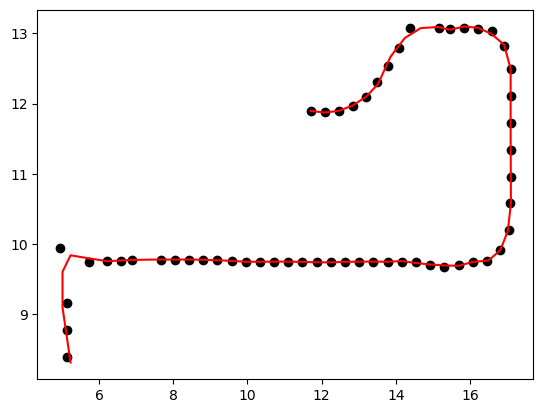

In [121]:
plt.plot(*points.T, 'ok', label='original points')
plt.plot(*i_points.T, '-r', label='fitted spline k=3, s=.2')

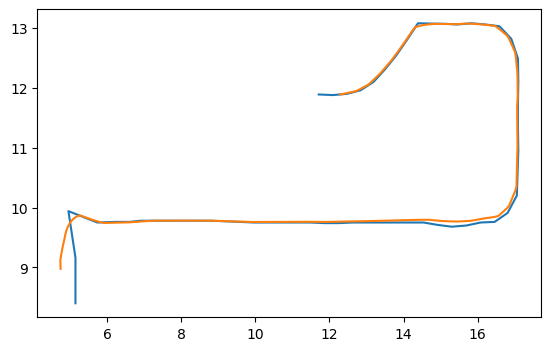

In [99]:
X_move = data[:,0]
Y_move = data[:,1]
x = points[:,0]
y = points[:,1]
fig1, ax1 = plt.subplots(figsize=(6.5, 4))
ax1.plot(x,y)
ax1.plot(X_move,Y_move)

/tmp/ipykernel_11915/584285264.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points_fitted = np.vstack( spl(alpha) for spl in splines ).T


Text(0, 0.5, 'y')

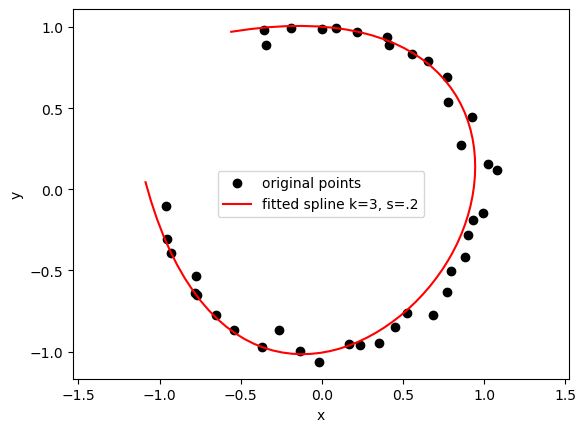

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import UnivariateSpline

# Define some points:
theta = np.linspace(-3, 2, 40)
points = np.vstack( (np.cos(theta), np.sin(theta)) ).T

# add some noise:
points = points + 0.05*np.random.randn(*points.shape)

# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

# Build a list of the spline function, one for each dimension:
splines = [UnivariateSpline(distance, coords, k=3, s=.2) for coords in points.T]

# Computed the spline for the asked distances:
alpha = np.linspace(0, 1, 75)
points_fitted = np.vstack( spl(alpha) for spl in splines ).T

# Graph:
plt.plot(*points.T, 'ok', label='original points')
plt.plot(*points_fitted.T, '-r', label='fitted spline k=3, s=.2')
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y')

In [11]:
def searchNearyByCheckpoint(totalPoint,graphPoints,pos):
    pos = np.array((pos[0],pos[1]))
    EuclDistance = np.mean(np.square(graphPoints - pos),axis=1)
    min_idex = np.argmin(EuclDistance)
    return totalPoint[min_idex]
import numpy as np
from graph_data import graph_data
totalPoint = graph_data.keys()
points = []
keys = []
for i in totalPoint:
    keys.append(int(i))
    point_i = [graph_data[i]['x'], graph_data[i]['y']]
    points.append(point_i)
GraphPoints = np.array(points)

In [12]:
searchNearyByCheckpoint(keys,GraphPoints,[5.15, 7.84])

4

In [ ]:
#Day0: A* path planning
#Day1: IMU path following (Trung)
"""
    1 - Spline interpolating ( 10 points from 3 points) done
    2 - move to 1 point
    3 - move full map 
"""
#Day 2-3: Fusion camera and IMU(add Noise) (Trung)
""" 
    1 - Camera memory for interpolation
    2 - Fusion camera and IMU
    2 - moving full map no object with IMU - Camera add Noise
"""

#Day 2: Test Model AI on map full object  (Trieu-Dinh)
"""
    1 - Data collecting (Trieu)
    1 - Train- Test model AI (Dinh)
"""
#Day 3: Full Map running and control rule (Trieu)
""" 
    1. test model AI on ROS
    2. Control Rule for traffic sign/ light
"""

#Day 4-5-6: object detection and lane switch (Tien)
"""
    1 - Swith lane
    2 - measure distance from object to car
    3 - moving in unchange path to avoid collision
    2 - control rule for avoiding collision 
"""
#Day 4-5:Car parking (Trung)
""" 
    1 - sign recognition
    2 - available space for parking
    3 - go to the setup position
    2 - Moving automatic to the path
"""

#Day 5-6: up hill/ high way control (Trieu)
""" 
    1 - setup uphill/ high-way zone on Map
    2 - setup high speed for high way zone
    3 - setup low speed for up hill zone
"""

# Day 7: combine things together(Trung)
""" 
    1 - Run full map
"""